<a href="https://colab.research.google.com/github/JustinWitter/MusicAnalyticsProjects/blob/main/Prototype_Song_Recommendation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave

def get_waveform(song_path, n_frames):
  obj = wave.open(song_path,"rb")
  frames = obj.readframes(-1)
  waveform = np.frombuffer(frames, dtype=np.int16)
  obj.close()
  return waveform[:n_frames]

def show_waveform(song_path):

  # get waveform data
  obj = wave.open(song_path,"rb")
  sample_freq = obj.getframerate()
  n_samples = obj.getnframes()
  frames = obj.readframes(-1)
  waveform = np.frombuffer(frames, dtype=np.int16)
  obj.close()

  # create time array
  t_audio = n_samples/ sample_freq
  times = np.linspace(0, t_audio, num=n_samples*2)

  # plot waveform
  plt.figure(figsize=(15,5))
  plt.plot(times,waveform)
  plt.ylabel("Amplitude")
  plt.xlabel("Time (s)")
  plt.xlim(0, t_audio)
  plt.show()

In [ ]:
# "songtitle_artist.wav"
paths = ["/content/kevinsheart_jc.wav","/content/kod_jc.wav","/content/atm_jc.wav","/content/motiv8_jc.wav",
         "/content/love_kl.wav","/content/dna_kl.wav","/content/humble_kl.wav","/content/element_kl.wav"]

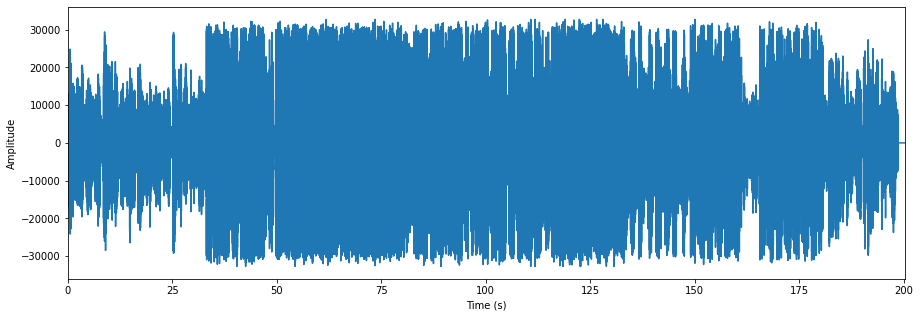

In [ ]:
show_waveform(paths[0])

In [ ]:
# limit audio frames due to variation in song duration
n_frames = 6000000

# get waveforms for each song
waves = [get_waveform(path, n_frames) for path in paths]
waves = np.asarray(waves)

In [ ]:
from sklearn.manifold import TSNE

def display_tsne(waves):
  
  # get tSNE embedding
  num_iters = 5000
  perplexity = 50
  tsne = TSNE(n_components = 2, n_iter = num_iters, perplexity = perplexity, init = 'random', learning_rate = 'auto')
  tsne.fit(waves)
  coords = tsne.embedding_

  # display song coordinates
  for i in range(len(paths)):
    print(paths[i][9:], "is at", coords[i])

  # plot tSNE embedding
  print()
  plt.scatter(coords.T[0], coords.T[1], c = [1,1,1,1,2,2,2,2])

kevinsheart_jc.wav is at [28.026165 42.239143]
kod_jc.wav is at [-21.73322    -7.3173704]
atm_jc.wav is at [ 15.504923 -66.853645]
motiv8_jc.wav is at [-88.05027  -30.369444]
love_kl.wav is at [ 48.01562  -15.320462]
dna_kl.wav is at [-29.451223  62.46195 ]
humble_kl.wav is at [-45.05876 -73.54592]
element_kl.wav is at [-81.119194  30.16655 ]



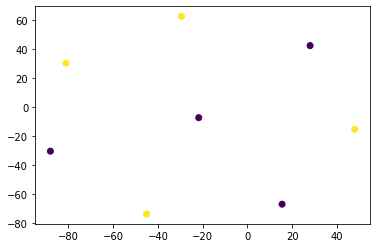

In [ ]:
display_tsne(waves)

kevinsheart_jc.wav is at [ 66.68816  -24.051022]
kod_jc.wav is at [36.90357  28.345531]
atm_jc.wav is at [-22.635553  37.71122 ]
motiv8_jc.wav is at [ -2.5970113 -28.789652 ]
love_kl.wav is at [-62.97852 -63.12802]
dna_kl.wav is at [-67.08061    -2.9964488]
humble_kl.wav is at [ 44.318264 -80.01693 ]
element_kl.wav is at [-13.394223 -97.390854]



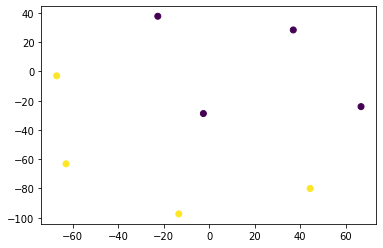

In [ ]:
display_tsne(waves)

kevinsheart_jc.wav is at [   6.7509484 -100.332794 ]
kod_jc.wav is at [-99.687454 -65.97501 ]
atm_jc.wav is at [109.30134  72.42096]
motiv8_jc.wav is at [-81.64473 134.2536 ]
love_kl.wav is at [ 29.11    150.52568]
dna_kl.wav is at [-139.67528    38.577423]
humble_kl.wav is at [-10.766337  27.214619]
element_kl.wav is at [100.471664 -39.138863]



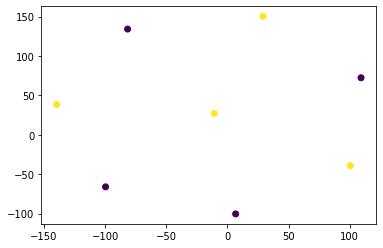

In [ ]:
display_tsne(waves)